Visualizing Hierarchies
----
Visualizations help data scientists communicate insights, especially to non-technical audiences.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [23]:
grains = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\Grains\seeds.csv")
grains = grains.iloc[:-168]
samples = grains.iloc[:,:-1].values
varieties = grains.iloc[:,-1].values

Hierarchical Clustering of Grain Data
----

Use the linkage() function from SciPy to perform hierarchical clustering on the array samples.
Visualize the clustering result with the dendrogram() function.
The array samples contains grain measurements, and the list varieties holds the corresponding grain types.

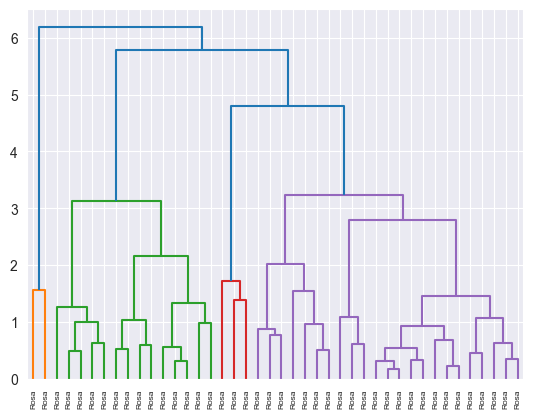

In [25]:
#1. Import:linkage and dendrogram from scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram

#2. Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to merging.
mergings = linkage(samples, method='complete')
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()